# <center> ***Proyecto Integrador*** </center>
## <center> ***Avance 2*** </center>
### Profesores: Dra. Grettel Barceló, Dr. Luis Enrique Falcón. 
### Alumnos:

* Aurelio Antonio Lozano Rábago      A01081266


#### <p style='text-align: right;'> 12 de Mayo del 2024 </p>

Now that a possible method for detecting the mowing area has been determined, this delivery will focus on aligning computer vision with the machine's pose accurately. To navigate along the boundary of the mowing area, behavioral cloning will be the framework explored.

Due to limited access to the mowers, it was decided to develop the project using a prototype, consisting of the following architecture:

Rover: Waveshare rover

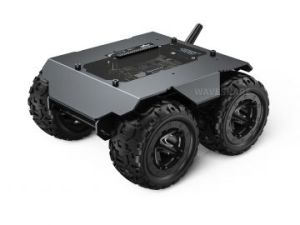

https://www.waveshare.com/wiki/WAVE_ROVER#Introduction

The Waveshare rover is a mobile robot chassis compatible with Raspberry Pi, Jetson Nano, and Jetson Orin Nano, communicating with the ESP32 slave computer through a serial port.

Processing is planned to be done using a Jetson Orin Nano, where a camera will capture the images.

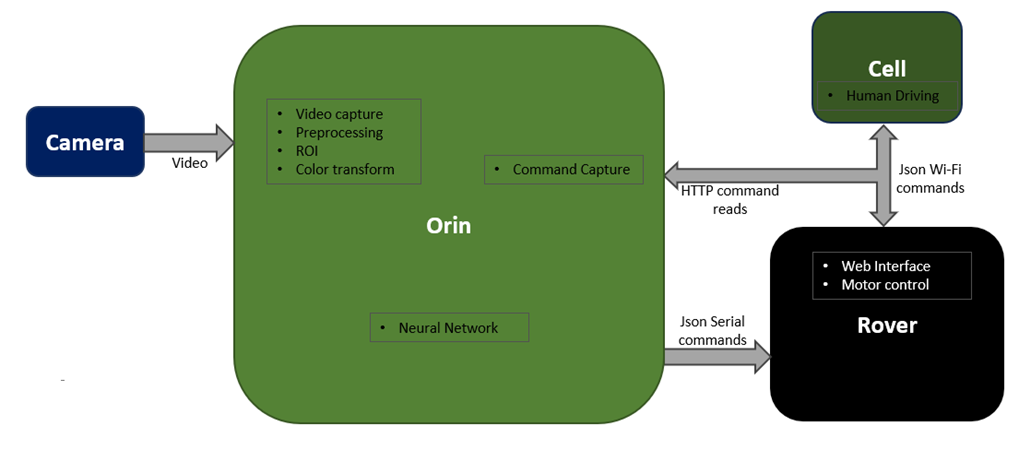

# Behavioral Cloning
Involves capturing images and sensor readings during human driving to replicate the behavior using a neural network. The first step is to capture images and sensor readings. Image capture requires preprocessing, typically involving defining a Region of Interest (ROI), reshaping, and adjusting the color spectrum to prepare it for input into the neural network.

The scope of this notebook is to propose the processing algorithms for image preprocessing (excluding the region of interest, as it needs to be defined once the camera is set up in the Rover).




## Image pre processing
The following code sections aim to synthesize the exploration conducted in the previous delivery (Avance0). They consist of a code draft designed to perform color filtering on the grass area, filter the green zone (Blur and Canny), and detect lines using the Hough transform.

The code includes test images used in the previous delivery. However, it only displays the result for a single chosen image.

In [1]:
#Library import
import cv2
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

In [2]:
#load the paths to the images
image_paths = [
    'ImagenesA1/frame1.jpeg',
    'ImagenesA1/frame2.jpeg',
    'ImagenesA1/frame3.jpeg',
    'ImagenesA1/frame4.jpeg',
    'ImagenesA1/frame5.jpeg',
    'ImagenesA1/frame6.jpeg',
    'ImagenesA1/frame7.jpeg',
    'ImagenesA1/frame8.jpeg',
    'ImagenesA1/frame9.jpeg',
    'ImagenesA1/Internet/frame1.jpeg',
    'ImagenesA1/Internet/frame2.jpeg',
    'ImagenesA1/Internet/frame3.jpeg',
    'ImagenesA1/Internet/frame4.jpeg',
    'ImagenesA1/Internet/frame5.jpeg',
    'ImagenesA1/Internet/frame6.jpeg',
    'ImagenesA1/Internet/frame7.jpeg',
    'ImagenesA1/Internet/frame8.jpeg',
    'ImagenesA1/Internet/frame9.jpeg',
    'ImagenesA1/Internet/frame10.jpeg',
    'ImagenesA1/Internet/frame11.jpeg',
    'ImagenesA1/Internet/frame12.jpeg',
    'ImagenesA1/Internet/frame13.jpeg',
    'ImagenesA1/Internet/frame14.jpeg',
    'ImagenesA1/Internet/frame15.jpeg',
    'ImagenesA1/Internet/frame16.jpeg',
    'ImagenesA1/Internet/frame17.jpeg',
    'ImagenesA1/Internet/frame18.jpeg',
    'ImagenesA1/Internet/frame19.jpeg',
    'ImagenesA1/Internet/frame20.jpeg',
    'ImagenesA1/Internet/frame21.jpeg',
    'ImagenesA1/Internet/frame22.jpeg',
    'ImagenesA1/Plantas/frame1.jpeg',
    'ImagenesA1/Plantas/frame2.jpeg',
    'ImagenesA1/Plantas/frame3.jpeg',
    'ImagenesA1/Plantas/frame4.jpeg',
    'ImagenesA1/Plantas/frame5.jpeg',
    'ImagenesA1/Plantas/frame6.jpeg',
    'ImagenesA1/Plantas/frame7.jpeg',
    'ImagenesA1/Plantas/frame8.jpeg',
    'ImagenesA1/Plantas/frame9.jpeg',
    'ImagenesA1/Plantas/frame10.jpeg',
    'ImagenesA1/Plantas/frame11.jpeg',
    'ImagenesA1/Plantas/frame12.jpeg',
    'ImagenesA1/Plantas/frame13.jpeg',
    'ImagenesA1/Plantas/frame14.jpeg',
    'ImagenesA1/Plantas/frame15.jpeg',
]

In [3]:
#read sample image
image = cv2.imread(image_paths[12]) 

In [4]:
#Filtering non green areas
# Define the green color range
lower_green = np.array([20, 30, 40])  # low green value
upper_green = np.array([90, 255, 255]) # high green value
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
mask = cv2.inRange(hsv, lower_green, upper_green)
blurred_image = cv2.bitwise_and(image, image, mask=mask)


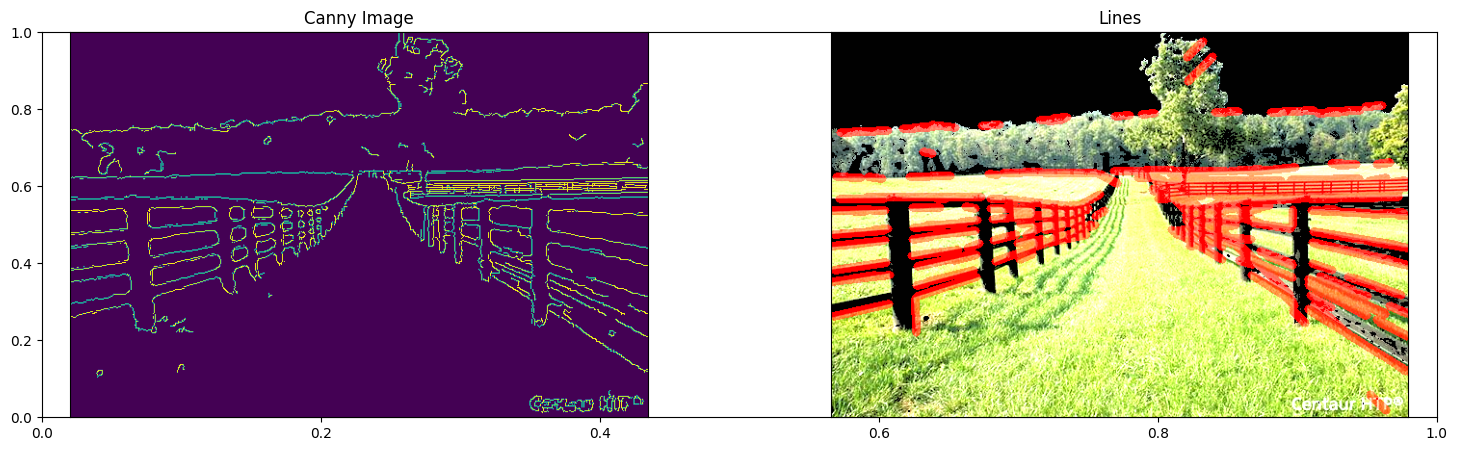

In [5]:
#Blur + Canny + Hough 
alpha=1
beta=1
gamma=1

#filtered_image1 = cv2.bilateralFilter(blurred_image, d=9, sigmaColor=200, sigmaSpace=200)
filtered_image1 = cv2.blur(blurred_image, (5, 5))
canny_filtered_image1 = cv2.Canny(filtered_image1, 100, 200)
# Detectar líneas usando la transformada de Hough en la imagen con filtro Canny
lines1 = cv2.HoughLinesP(canny_filtered_image1, 1, np.pi/180, threshold=50, minLineLength=10, maxLineGap=10)


# Crear una matriz para dibujar las líneas
img_lines = np.copy(blurred_image)

# Dibujar cada una de las líneas sobre la imagen original
if lines1 is not None:
    for line in lines1:
        x1, y1, x2, y2 = line[0]
        cv2.line(img_lines, (x1, y1), (x2, y2), [0, 0, 255], 7)

# Combinar la imagen original con las líneas dibujadas
img_lane_lines = cv2.addWeighted(blurred_image, alpha, img_lines, beta, gamma)
img_lane_lines2 = cv2.cvtColor(img_lane_lines, cv2.COLOR_BGR2RGB)

plt.subplots(figsize=(18, 5))
plt.subplot(121),plt.imshow(canny_filtered_image1)
plt.title('Canny Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_lane_lines2)
plt.title('Lines'), plt.xticks([]), plt.yticks([])

plt.show()

## Sensor Command read

Next blocks icludes the read of the commanded signals to the Rover while bein driven by a human. 
To reduce the scope of the project and make suitable in a 10 weeks timeframe, the native rover control will be used. 

Rover comes with a ESP32, which enables a WiFi network and a Web Interface to Control the rover, this interface is going to be used to perform the image and sensor capture. 
Image capture will be done using Open CV, while Sensor capture was more challenging as was something new for me. 

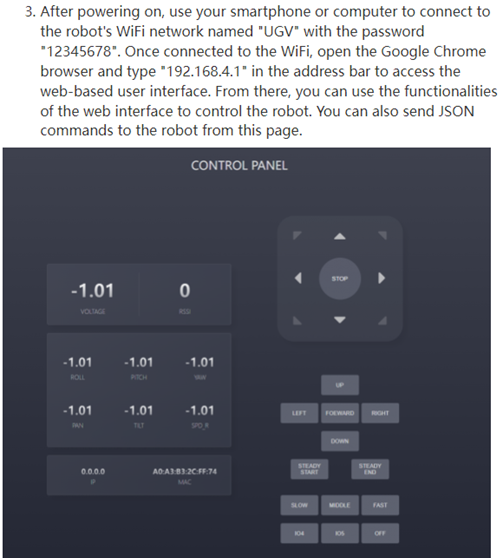


The process consis on sniffing the web interface host and filtering the HTTP requests (instead of trying to get the JSON commands).

## DO not excecute the following code, as it requires the WiFi interface deployed by the Rover.

Leer comandos

In [8]:
from scapy.all import *
from scapy.layers.http import HTTP
from scapy.layers.http import HTTPRequest

# Definir una función para manejar los paquetes capturados
def handle_packet(packet):
    # Verificar si el paquete contiene un mensaje HTTP Request y el método es 'GET'
    if (
        packet.haslayer(HTTP) and 
        packet[HTTP].haslayer(HTTPRequest) and 
        packet[HTTP][HTTPRequest].Method.decode() == 'GET' and
        packet[HTTP][HTTPRequest].Path.decode().startswith("/cmd")
        #packet[HTTP][HTTPRequest].Path.decode() ==  '/cmd
    ):
        # Imprimir los campos específicos del mensaje HTTP Request
        print("Method:", packet[HTTP][HTTPRequest].Method.decode())
        print("Path:", packet[HTTP][HTTPRequest].Path.decode())
        print()

# Capturar paquetes en tiempo real y filtrar por dirección IP 192.168.4.1 y puerto 80
sniff(prn=handle_packet, filter="host 192.168.4.1 and port 80")

Method: GET
Path: /cmd?inputA=1&inputB=0&inputC=0

Method: GET
Path: /cmd?inputA=1&inputB=1&inputC=-1

Method: GET
Path: /cmd?inputA=1&inputB=1&inputC=-1

Method: GET
Path: /cmd?inputA=1&inputB=1&inputC=-1

Method: GET
Path: /cmd?inputA=1&inputB=1&inputC=-1

Method: GET
Path: /cmd?inputA=1&inputB=1&inputC=-1

Method: GET
Path: /cmd?inputA=1&inputB=1&inputC=-1

Method: GET
Path: /cmd?inputA=1&inputB=1&inputC=-1

Method: GET
Path: /cmd?inputA=1&inputB=1&inputC=-1

Method: GET
Path: /cmd?inputA=1&inputB=0&inputC=0

Method: GET
Path: /cmd?inputA=1&inputB=0&inputC=0

Method: GET
Path: /cmd?inputA=1&inputB=0&inputC=0

Method: GET
Path: /cmd?inputA=1&inputB=0&inputC=0

Method: GET
Path: /cmd?inputA=1&inputB=0&inputC=0



<Sniffed: TCP:416 UDP:0 ICMP:0 Other:0>

## Video Capture
getting the video using Open CV, unfortunately the Nvidia Orin Nano is not available, so I'm using the computer camera)

In [6]:
import numpy as np
import cv2 as cv

cap = cv.VideoCapture(0)
if not cap.isOpened():
    print("No se puede abrir la cámara")
    exit()

while True:
    # Captura el frame
    ret, frame = cap.read()

    # Si el frame se captura correctamente, ret es True
    if not ret:
        print("No se puede recibir el frame. Saliendo...")
        break

    # Muestra el frame resultante
    cv.imshow('frame', frame)

    # Si se presiona la tecla 'q', sale del bucle
    if cv.waitKey(1) == ord('q'):
        break

# Cuando se termina, libera la captura
cap.release()
cv.destroyAllWindows()

All together to get the images and the sensor commands (using computer camera as the Orin is not available)

In [28]:
from scapy.all import *
from scapy.layers.http import HTTP
from scapy.layers.http import HTTPRequest
import numpy as np
import cv2 as cv
import csv
import os

# Archivo CSV para guardar los paths
csv_file = open('paths.csv', mode='w', newline='')
csv_writer = csv.writer(csv_file)

# Definir una función para manejar los paquetes capturados
def handle_packet(packet):
    # Verificar si el paquete contiene un mensaje HTTP Request y el método es 'GET'
    if (
        packet.haslayer(HTTP) and 
        packet[HTTP].haslayer(HTTPRequest) and 
        packet[HTTP][HTTPRequest].Method.decode() == 'GET' and
        packet[HTTP][HTTPRequest].Path.decode().startswith("/cmd")
    ):
        # Guardar el path en el archivo CSV
        path = packet[HTTP][HTTPRequest].Path.decode()
        image_name = f"image_{len(os.listdir('images'))}.jpg"
        image_path = os.path.join("images", image_name)
        csv_writer.writerow([path, image_path])

        # Capturar frame de la cámara y guardarlo como imagen
        ret, frame = cap.read()
        if ret:
            cv.imwrite(image_path, frame)
            #print(f"Imagen guardada como {image_path}")

# Iniciar la captura de paquetes en tiempo real
sniff_thread = AsyncSniffer(prn=handle_packet, filter="host 192.168.4.1 and port 80")
sniff_thread.start()

# Iniciar la captura de video desde la cámara
cap = cv.VideoCapture(0)
if not cap.isOpened():
    print("No se puede abrir la cámara")
    exit()

# Obtener la resolución actual de la cámara
width = int(cap.get(cv.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv.CAP_PROP_FRAME_HEIGHT))

# Reducir la resolución a una cuarta parte
new_width = width // 2
new_height = height // 2

# Establecer la nueva resolución de la cámara
cap.set(cv.CAP_PROP_FRAME_WIDTH, new_width)
cap.set(cv.CAP_PROP_FRAME_HEIGHT, new_height)

while True:
    # Verificar si se ha presionado la tecla 'q' para salir del programa
    # Muestra el frame resultante
    cv.imshow('frame', frame)
    if cv.waitKey(1) == ord('q'):
        break

# Detener la captura de paquetes en tiempo real
sniff_thread.stop()

# Cerrar la captura de video
cap.release()

# Cerrar el archivo CSV
csv_file.close()

# Cerrar las ventanas de OpenCV
cv.destroyAllWindows()

# Merging the images and the respective commands

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split

def load_images_and_commands(csv_path, img_dir):
    # Cargar el archivo CSV
    data = pd.read_csv(csv_path, names=['Path', 'Image_Path'])

    # Leer las rutas de las imágenes y los comandos
    image_paths = data['Image_Path'].values
    commands = data['Path'].values

    # Dividir los datos en conjuntos de entrenamiento y validación
    train_image_paths, val_image_paths, train_commands, val_commands = train_test_split(image_paths, commands, test_size=0.2, random_state=42)

    return train_image_paths, val_image_paths, train_commands, val_commands

# Ruta al archivo CSV generado
csv_path = 'paths.csv'
# Directorio donde se guardaron las imágenes
img_dir = 'images'

# Cargar imágenes y comandos y generar conjuntos de entrenamiento y validación
train_image_paths, val_image_paths, train_commands, val_commands = load_images_and_commands(csv_path, img_dir)

# Imprimir la cantidad de datos de entrenamiento y validación
print(f"Datos de entrenamiento: {len(train_image_paths)}")
print(f"Datos de validación: {len(val_image_paths)}")

Datos de entrenamiento: 132
Datos de validación: 34


The data above represents a recording of around 1.5min, so we are getting 166 images in 90s, which is one image every .54s, which may be more that what we will require. 

Sample of the image-command file output:

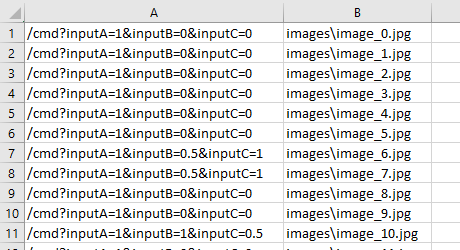

## Neural Network
The model to be used is the Nvidia Model, as is the one recommended at the Autonomous navegation course to be used for Behavioral cloning 

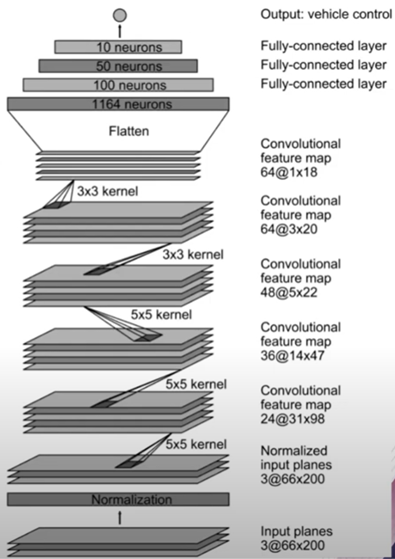

In [30]:

import keras
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Convolution2D, MaxPooling2D, Dropout, Flatten, Dense
def nvidia_model():
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Convolution2D(3, (5, 5), strides=(1, 1), input_shape=(66, 200, 3), activation='relu'))
    model.add(tf.keras.layers.Convolution2D(3, (5, 5), strides=(1, 1), activation='relu',kernel_regularizer=regularizers.l2(0.001)))
    model.add(Dropout(0.25))
    model.add(tf.keras.layers.Convolution2D(24, (5, 5), strides=(1, 1), activation='relu'))
    model.add(Dropout(0.25))
    model.add(tf.keras.layers.Convolution2D(36, (5, 5), strides=(2, 2), activation='relu'))
    model.add(Dropout(0.25))
    model.add(tf.keras.layers.Convolution2D(48, (3, 3), strides=(2, 2), activation='relu'))
    model.add(tf.keras.layers.Convolution2D(64, (3, 3), strides=(2, 2), activation='relu'))
    model.add(tf.keras.layers.Convolution2D(64, (3, 3), activation='relu'))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(1164, activation='relu'))
    model.add(Dropout(0.25))
    model.add(tf.keras.layers.Dense(100, activation='relu'))
    model.add(Dropout(0.25))
    model.add(tf.keras.layers.Dense(50, activation='relu'))
    model.add(Dropout(0.25))
    model.add(tf.keras.layers.Dense(10, activation='relu',kernel_regularizer=regularizers.l2(0.001)))
    model.add(Dropout(0.25))
    model.add(tf.keras.layers.Dense(1, activation='linear'))
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(loss='mse', optimizer=optimizer)
    return model